**Decision Tree & Naïve Bayes Classification**

In [387]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [388]:
#Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [390]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [391]:
# Check missing values in variables

df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


In [392]:
df['Health_Issues'].fillna('None', inplace=True)
display(df.head())

/tmp/ipython-input-2380951614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Health_Issues'].fillna('None', inplace=True)


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


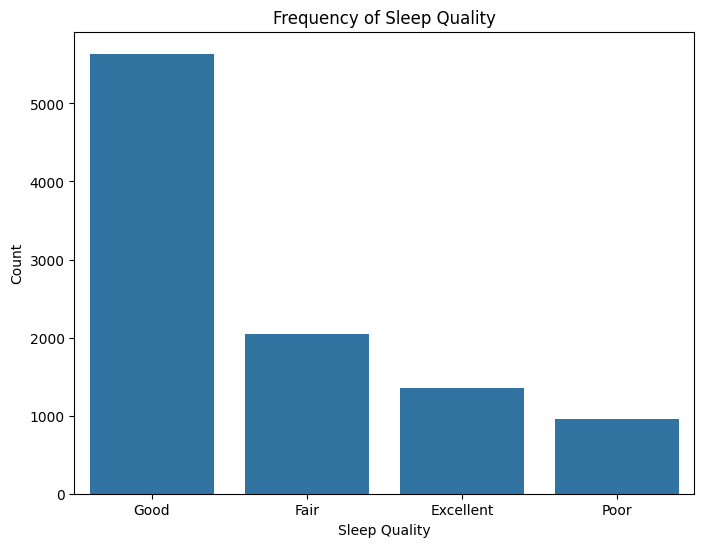

In [394]:
# Visualization: Frequency of Sleep Quality
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep_Quality', data=df)
plt.title('Frequency of Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.show()

**Interpretation of Frequency of Sleep Quality Visualization:**

This bar plot shows the count of individuals for each category of Sleep Quality (Poor, Fair, Good, Excellent). It provides a clear picture of the distribution of sleep quality within the dataset. You can quickly see which sleep quality is most common and which is least common among the individuals in this dataset.

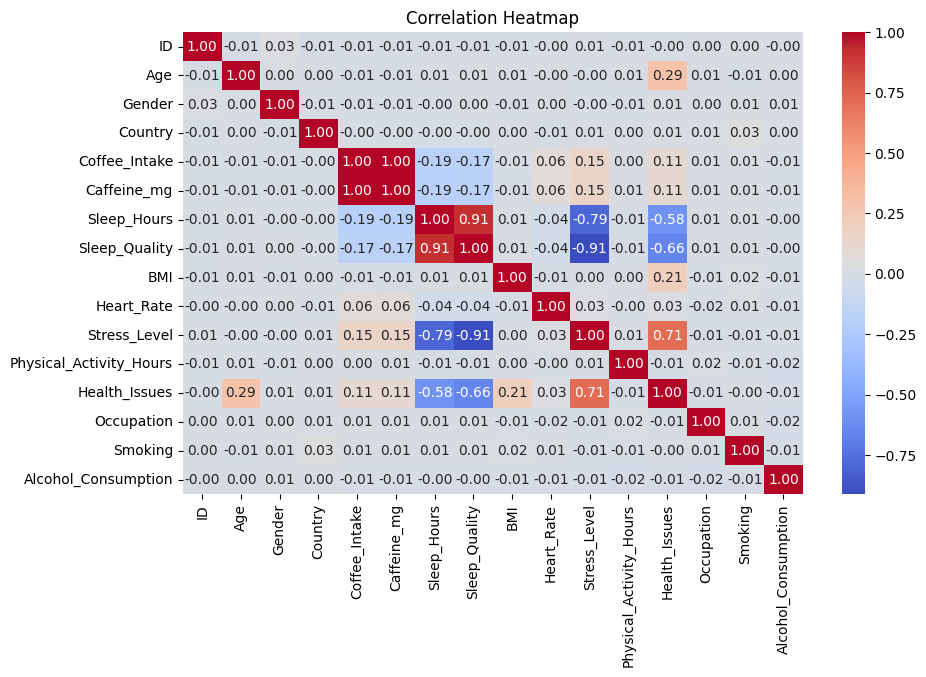

In [426]:
# Visualization: Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Sleep and stress factors show the most significant relationships: sleep duration and sleep quality strongly influence stress levels and overall health.

Health issues are most closely associated with high stress, poor sleep quality, and shorter sleep duration.

Other lifestyle habits (such as smoking and alcohol consumption) do not show strong correlations in this dataset, which may be due to balanced data distribution or the limited sample size.

Age and BMI have only weak correlations with health issues, but there is still a slight positive tendency.

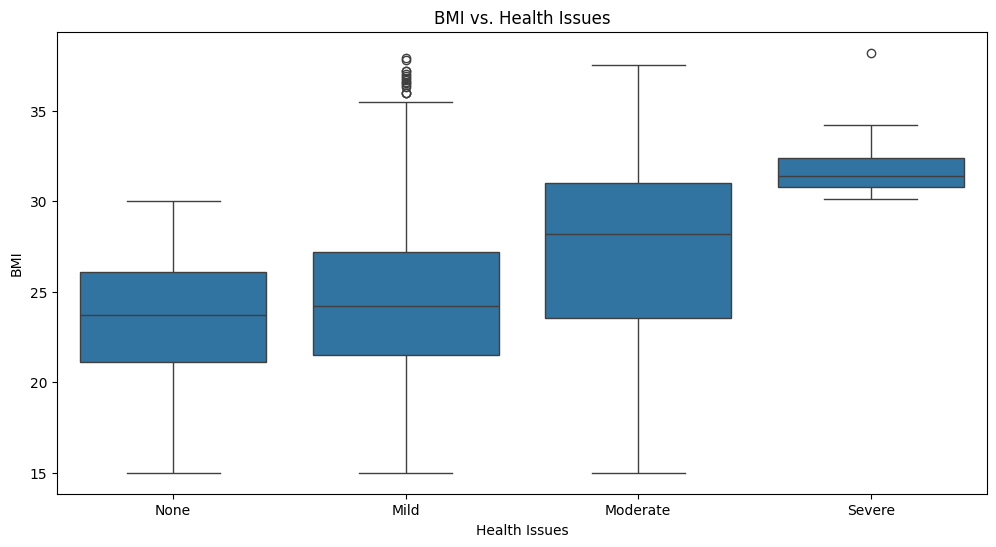

In [395]:
# Visualization: BMI vs. Health Issues
plt.figure(figsize=(12, 6))
sns.boxplot(x='Health_Issues', y='BMI', data=df)
plt.title('BMI vs. Health Issues')
plt.xlabel('Health Issues')
plt.ylabel('BMI')
plt.show()

**Interpretation of BMI vs. Health Issues Visualization:**

This box plot shows the distribution of Body Mass Index (BMI) for each category of Health Issues (None, Mild, Moderate, Severe). By examining the box plots, we can see the median BMI, the spread of BMI values (interquartile range), and any outliers for each health issue category. This visualization helps us understand if there is a relationship between BMI and the severity of health issues in this dataset. For example, you can observe if individuals with more severe health issues tend to have higher or lower BMI values compared to those with no or mild health issues.

### Encode categorical variables


In [396]:
ordinal_columns = ['Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Country', 'Occupation','Gender']

for column in ordinal_columns:
  print(f"Unique values in '{column}': {df[column].unique()}")

Unique values in 'Sleep_Quality': ['Good' 'Fair' 'Excellent' 'Poor']
Unique values in 'Stress_Level': ['Low' 'Medium' 'High']
Unique values in 'Health_Issues': ['None' 'Mild' 'Moderate' 'Severe']
Unique values in 'Country': ['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
Unique values in 'Occupation': ['Other' 'Service' 'Office' 'Student' 'Healthcare']
Unique values in 'Gender': ['Male' 'Female' 'Other']


In [397]:
# Encoding for ordinal column
Sleep_Quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
Stress_Level_map = {'Low': 1, 'Medium': 2, 'High': 3}
Health_Issues_map = {'None': 1, 'Mild': 2, 'Moderate': 3, 'Severe': 4}

df['Sleep_Quality'] = df['Sleep_Quality'].map(Sleep_Quality_map)
df['Stress_Level'] = df['Stress_Level'].map(Stress_Level_map)
df['Health_Issues'] = df['Health_Issues'].map(Health_Issues_map)

In [398]:
# Create mappings for each nominal column
country_mapping = {country: i+1 for i, country in enumerate(df['Country'].unique())}
occupation_mapping = {occupation: i+1 for i, occupation in enumerate(df['Occupation'].unique())}
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2}

# Apply the mappings
df['Country'] = df['Country'].map(country_mapping)
df['Occupation'] = df['Occupation'].map(occupation_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)

# Display the first few rows with the new encoded columns
display(df[['Gender','Country',  'Occupation', ]].head())

,Gender,Country,Occupation
0,0,1,1
1,0,1,2
2,0,2,3
3,0,1,1
4,1,3,4


# **Declare feature vector and target variable** <a class="anchor" id="10"></a>

In [399]:
X = df.drop(['Health_Issues', 'ID'], axis=1)
y = df['Health_Issues']

In [400]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,0,1,3.5,328.1,7.5,3,24.9,78,1,14.5,1,0,0
1,33,0,1,1.0,94.1,6.2,3,20.0,67,1,11.0,2,0,0
2,42,0,2,5.3,503.7,5.9,2,22.7,59,2,11.2,3,0,0
3,53,0,1,2.6,249.2,7.3,3,24.7,71,1,6.6,1,0,0
4,32,1,3,3.1,298.0,5.3,2,24.1,76,2,8.5,4,0,1


In [401]:
y.head()

,Health_Issues
0,1
1,1
2,2
3,2
4,2


# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [402]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [403]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [404]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,0,3,4.3,405.6,5.4,2,18.0,86,2,2.4,2,0,1
1561,26,0,18,0.0,0.0,5.5,2,28.3,75,2,10.8,1,0,0
1670,32,0,20,2.8,268.1,7.3,3,27.4,69,1,8.6,3,0,0
6087,18,0,20,2.2,208.6,8.1,4,16.3,83,1,8.9,1,0,1
6669,43,1,7,2.6,251.1,9.4,4,25.4,68,1,3.4,3,0,0


In [405]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,0,19,2.6,245.9,6.7,3,30.1,76,1,1.9,2,0,1
4684,22,1,4,3.1,293.1,7.6,3,20.4,69,1,5.0,2,0,0
1731,30,0,15,3.9,372.4,6.4,3,27.5,75,1,13.8,3,0,0
4742,35,0,1,1.0,92.5,5.3,2,23.1,71,2,2.4,2,0,0
4521,47,0,10,1.3,119.0,6.9,3,28.4,64,1,9.6,3,1,0


In [406]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [407]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [408]:
y_pred_gini = clf_gini.predict(X_test)

In [409]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


# Visualize decision-trees

[Text(0.5, 0.9, 'x[6] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [0, 6, 8, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 0, 132, 0]'),
 Text(0.375, 0.5, 'x[7] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[7] <= 29.95

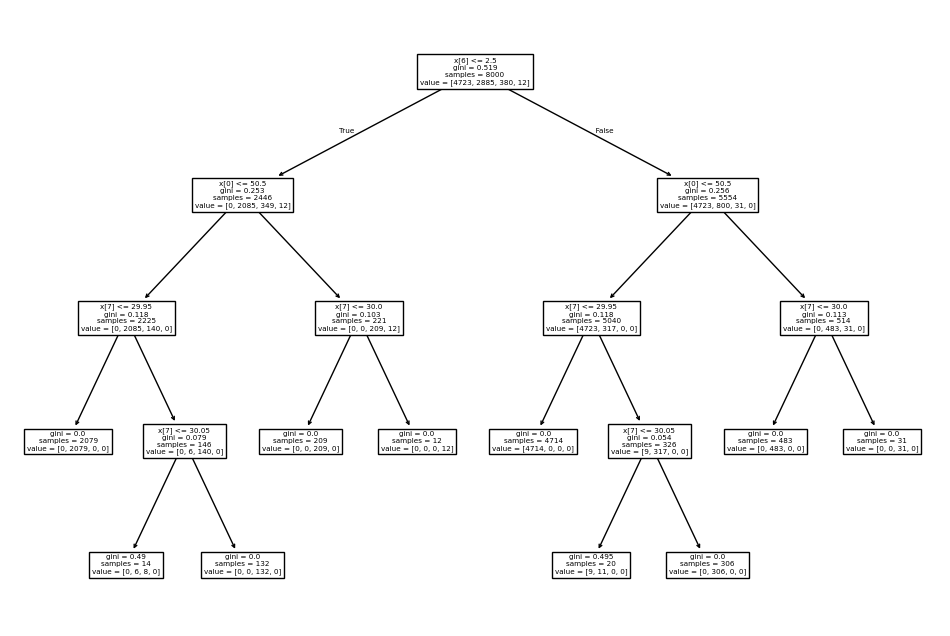

In [410]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>

In [411]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [412]:
y_pred_en = clf_en.predict(X_test)

In [413]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


[Text(0.5, 0.875, 'x[6] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.625, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.375, 0.375, 'x[7] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [4723, 317, 0, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsample

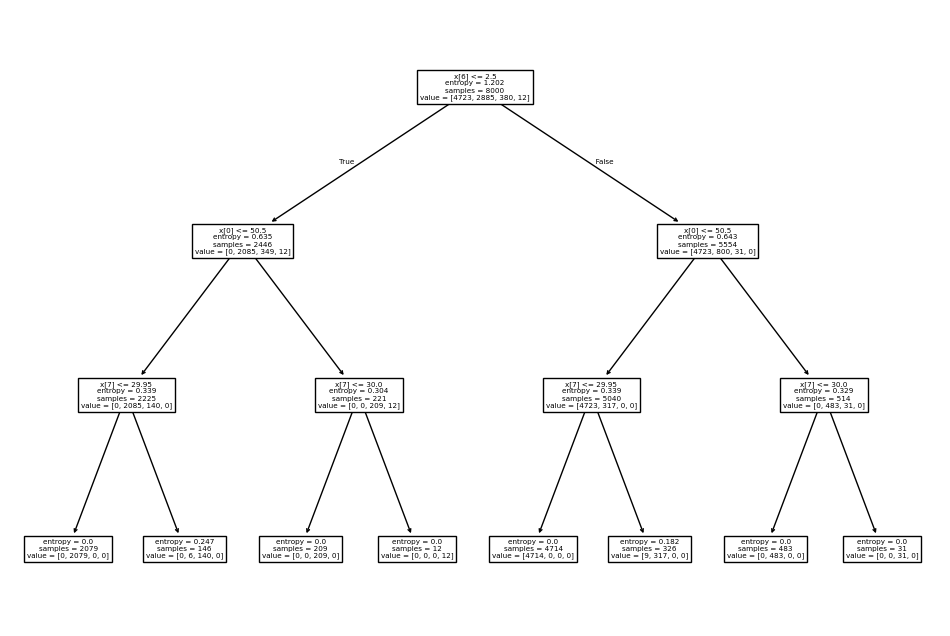

In [414]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [415]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [416]:
y_pred_nb = nb_classifier.predict(X_test)

In [417]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8570


# **Classification Report** <a class="anchor" id="16"></a>

In [418]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1218
           2       0.99      1.00      0.99       694
           3       0.99      0.99      0.99        83
           4       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [419]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1218
           2       0.99      1.00      0.99       694
           3       0.99      0.99      0.99        83
           4       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [420]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92      1218
           2       0.88      0.70      0.78       694
           3       0.71      0.14      0.24        83
           4       0.00      0.00      0.00         5

    accuracy                           0.86      2000
   macro avg       0.61      0.46      0.48      2000
weighted avg       0.85      0.86      0.84      2000



## Compare performance accuracy

In [421]:
accuracy_scores = {
    'Model': ['Decision Tree (Gini)', 'Decision Tree (Entropy)', 'Naive Bayes'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_gini),
        accuracy_score(y_test, y_pred_en),
        accuracy_score(y_test, y_pred_nb)
    ]
}

accuracy_df = pd.DataFrame(accuracy_scores)
display(accuracy_df)

,Model,Accuracy
0,Decision Tree (Gini),0.9965
1,Decision Tree (Entropy),0.9965
2,Naive Bayes,0.8570


Both the Decision Tree models (Gini and Entropy) achieved an accuracy of 0.9965, which is significantly higher than the Naive Bayes model's accuracy of 0.8590.

In this case, both Decision Tree models performed equally well and can be considered the best models among the three for this dataset, based solely on accuracy. The choice between the two Decision Tree models might depend on other factors like interpretability (Gini tends to produce slightly more balanced trees) or computational cost, although with this dataset size, the difference is likely negligible.

The Naive Bayes model, while simpler and often faster to train, did not perform as well in terms of accuracy for this particular dataset and classification task.

The Decision Tree models (both Gini and Entropy) are the best-performing classifiers for this dataset.


In [422]:
# Make a prediction with the gini index model

# Input values: buying high, maint low, doors 4, persons 2, lug_boot med, safety low
# These values need to be encoded according to the maps created earlier
new_data = {
'Age': 28,
'Gender': gender_mapping['Male'],
'Country': country_mapping['Brazil'],
'Occupation': occupation_mapping['Student'],
'Coffee_Intake': 3,
'Caffeine_mg': 280,
'Sleep_Hours': 5,
'Sleep_Quality': Sleep_Quality_map['Poor'],
'BMI': 25.4,
'Heart_Rate': 85,
'Stress_Level': Stress_Level_map['High'],
'Physical_Activity_Hours': '2',
'Smoking':'1', #Yes
'Alcohol_Consumption': '1' #Yes
}

# Convert the input data to a pandas DataFrame
input_df = pd.DataFrame([new_data])
input_df = input_df[X.columns]
# Make the prediction using the gini model
prediction_gini = clf_gini.predict(input_df)

print("Prediction:", prediction_gini[0])

# reverse dictionary
inverse_prediction_gini = {v:k for k,v in Health_Issues_map.items()}

print(f"The predicted class for the given input using the gini index model is: {inverse_prediction_gini[prediction_gini[0]]}")

Prediction: 2
The predicted class for the given input using the gini index model is: Mild
